### **Modelling Experimental and Observational Data**


**Outline**

    Introduction
    Part 1: Analysis of FEV.csv
            Analysis and Findings
            Scatter Plot of FEV vs. Age
            Linear Regression (FEV vs. Age)
            Multiple Linear Regression (FEV vs. Age and Hgt)
            Model Evaluation

    Part 2: Analysis of BreastCancer.csv
            Data Splitting
            Logistic Regression Model
            Logistic Regression Model Evaluation
            Random Forest Classifier

    Part 3: Analysis of Salt Intake and Blood Pressure Contingency Table
            Hypotheses
            Chi-Square Test Results
            Interpretation


**Question 1.**

<p align = justify>Forced expiratory volume (FEV) is an index of pulmonary function that measures the volume of air expelled after 1 second of constant effort. Data set fev.csv contains determinations of FEV on 390 children ages 3 to 10. We are interested in how FEV is developed as the children grow up.

The description of the variables are as follows:


**Variable Description**

**ID** - ID number of each child

**FEV(liters)** - Forced expiratory volume

**Age(years)** - Age of the child

**Hgt(inches)** - Height of the child


---

**1.i**

(a) Read the data and save it as a data frame *mydata*.

(b) Check the dimension of mydata.

(c) Show the scatter plot of FEV versus Age.

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the data into a dataframe
from google.colab import files
uploaded = files.upload()

Saving fev.csv to fev.csv


In [3]:
# Read the file
mydata = pd.read_csv('fev.csv')
mydata.head()

,ID,fev,Age,Hgt
0,1,1.708,9,57.0
1,2,1.724,8,67.5
2,3,1.720,7,54.5
3,4,1.558,9,53.0
4,5,1.895,9,57.0


In [4]:
# Check the dimension of the dataframe
dimensions = mydata.shape
print("Dimensions of mydata:", dimensions)

Dimensions of mydata: (390, 4)


In [5]:
mydata.describe()

,ID,fev,Age,Hgt
count,390.000000,390.000000,390.000000,390.000000
mean,195.500000,2.169344,7.994872,58.075641
std,112.727548,0.580577,1.655395,4.774886
min,1.000000,0.791000,3.000000,46.000000
25%,98.250000,1.719250,7.000000,54.500000
50%,195.500000,2.107500,8.000000,58.000000
75%,292.750000,2.563250,9.000000,61.500000
max,390.000000,4.591000,10.000000,70.000000


In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      390 non-null    int64  
 1   fev     390 non-null    float64
 2   Age     390 non-null    int64  
 3   Hgt     390 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 12.3 KB


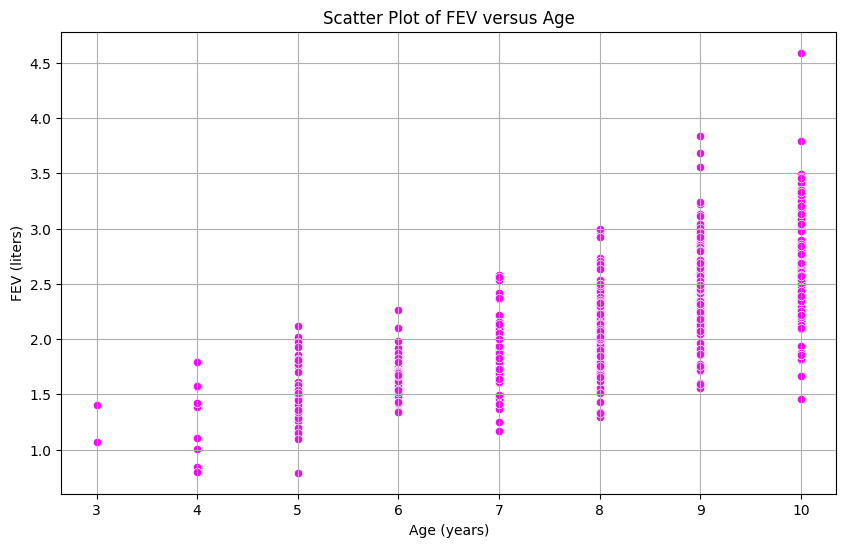

In [7]:
# Scatter plot of FEV versus Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='fev', data=mydata, color = 'magenta')
plt.xlabel('Age (years)')
plt.ylabel('FEV (liters)')
plt.title('Scatter Plot of FEV versus Age')
plt.grid(True)
plt.show()



---


**1.ii**
<br>
(a) Fit a linear regression model with FEV as the response and Age as the predictor. Write out the fitted regression model.

(b) According to the fitted model, interpret how FEV changes as the child grows.


---



In [ ]:
"""
# Using the statsmodels library to fit the linear regression model.
import statsmodels.api as sm

# Fit a linear regression model
X = mydata['Age']
y = mydata['fev']
X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model_summary = model.summary()
print(model_summary)

# Extract the coefficients
intercept = model.params[0]
slope = model.params[1]
print(f'Fitted regression model: FEV = {intercept:.2f} + {slope:.2f} * Age')
"""

In [9]:
# Using scikit-learn to fit the linear regression model.

# Reshape the data
X = mydata['Age'].values.reshape(-1, 1)
y = mydata['fev'].values

# Create and fit the model
OLR = LinearRegression()
OLR.fit(X, y)

# Extract the coefficients
intercept = OLR.intercept_
slope = OLR.coef_[0]

# Make predictions
y_pred = OLR.predict(X)

# Calculate additional metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Fitted regression model: FEV = {intercept:.2f} + {slope:.2f} * Age')
print(f'R-squared: {r2:.2f}')
print(f'Mean Squared Error: {mse:.2f}')

# Optional: detailed regression metrics
n = len(y)  # number of observations
p = 1       # number of predictors

# Calculate the adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print(f'Adjusted R-squared: {adjusted_r2:.2f}')

Fitted regression model: FEV = 0.25 + 0.24 * Age
R-squared: 0.47
Mean Squared Error: 0.18
Adjusted R-squared: 0.47


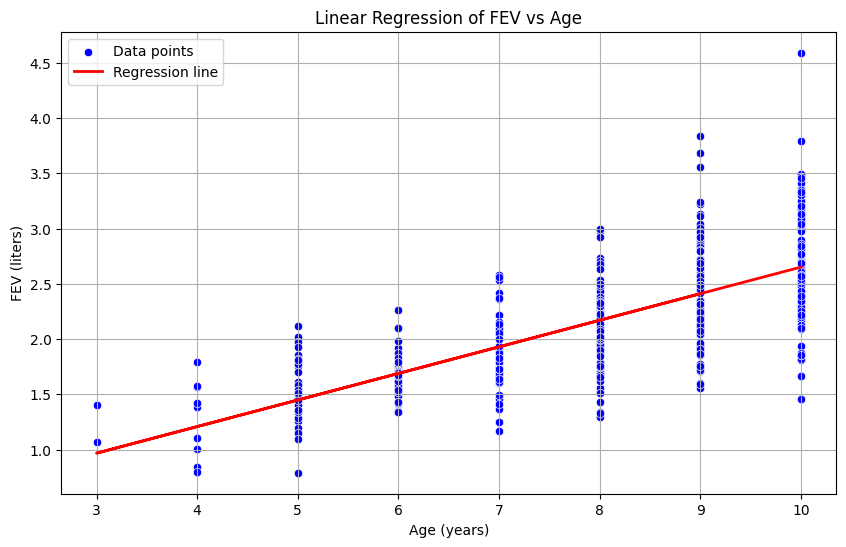

In [10]:
# Plot the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='fev', data=mydata, color='blue', label='Data points')
plt.plot(mydata['Age'], y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Age (years)')
plt.ylabel('FEV (liters)')
plt.title('Linear Regression of FEV vs Age')
plt.legend()
plt.grid(True)
plt.show()



---

### **Interpretation**

**Fitted Regression Model**
<br>

FEV = 0.25 + 0.24 × Age

<br>
<p align = justify>The coefficient of age (0.24) indicates that for each additional year of age, the FEV is expected to increase by 0.24 liters. This means that as children grow older, their pulmonary function, as measured by FEV, improves.
<br>

<br>
<p align = justify>The $𝑅^2$ value represents the proportion of the variance in the dependent variable (FEV) that is predictable from the independent variable (Age).
An $𝑅^2$ value of 0.47 means that 47% of the variability in FEV can be explained by the child's age. This indicates a moderate level of explanatory power for the model.
<br>

<br>
<p align = justify>he Mean Squared Error (MSE) measures the average of the squares of the errors, which are the differences between the observed and predicted values. An MSE of 0.18 indicates that, on average, the squared difference between the actual FEV values and the predicted FEV values is 0.18 liters. Lower MSE values indicate better model performance.
<br>

<br>
<p align = justify>The Adjusted $𝑅^2$ adjusts the $𝑅^2$ value based on the number of predictors and observations, providing a more accurate measure of model fit for multiple predictors. In this case, the Adjusted $𝑅^2$ is the same as the $𝑅^2$ (0.47), indicating that the model has only one predictor (Age).
<br>

<br>
<p align = justify>Overall, the model provides a reasonable fit for the data, showing that age is a significant predictor of FEV in children.
<br>
<p align = justify>However, there is still 53% of the variability in FEV that is not explained by age, indicating that other factors may also influence FEV.
<br>

---




**1.iii**

(a) <p align = justify>Fit a Multiple Linear Regression Model with FEV as the response and both Age and Hgt as the predictor
variables.  Write out the fitted regression model

(b) According to the fitted model, interpret how FEV changes as the child grows


In [11]:
# Reshape the data
X = mydata[['Age', 'Hgt']]
y = mydata['fev']

# Create and fit the model
MLR = LinearRegression()
MLR.fit(X, y)

# Extract the coefficients
intercept = MLR.intercept_
coefficients = MLR.coef_

# Make predictions
y_pred = MLR.predict(X)

# Calculate additional metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
n = len(y)  # number of observations
p = X.shape[1]  # number of predictors

# Calculate the adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Print the results
print(f'Fitted regression model: FEV = {intercept:.2f} + {coefficients[0]:.2f} * Age + {coefficients[1]:.2f} * Hgt')
print(f'R-squared: {r2:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Adjusted R-squared: {adjusted_r2:.2f}')

Fitted regression model: FEV = -3.64 + 0.02 * Age + 0.10 * Hgt
R-squared: 0.71
Mean Squared Error: 0.10
Adjusted R-squared: 0.71


In [ ]:
"""
# To plot the regression lines, let's use a 3D scatter plot with the regression plane since
# since we have two predictor variables (Age and Height) and one response variable (FEV).

# import library
from mpl_toolkits.mplot3d import Axes3D

# Plot the 3D regression plane
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(mydata['Age'], mydata['Hgt'], mydata['fev'], c='blue', marker='o', alpha=0.3, label='Data points')

# Create a mesh grid for the regression plane
age_range = np.linspace(mydata['Age'].min(), mydata['Age'].max(), 10)
height_range = np.linspace(mydata['Hgt'].min(), mydata['Hgt'].max(), 10)
age_grid, height_grid = np.meshgrid(age_range, height_range)
fev_grid = intercept + coefficients[0] * age_grid + coefficients[1] * height_grid

# Plot the regression plane
ax.plot_surface(age_grid, height_grid, fev_grid, color='red', alpha=0.3)

# Labels and title
ax.set_xlabel('Age (years)')
ax.set_ylabel('Height (inches)')
ax.set_zlabel('FEV (liters)')
ax.set_title('3D Regression Plane of FEV vs Age and Height')
ax.legend(loc='upper left')

# plt.show()
"""

#### **Interpretation**

FEV = -3.64 + 0.02 * Age + 0.10 * Hgt

*   <p align = justify>The regression model suggests that both age and height are significant predictors of FEV.

*   <p align = justify>The coefficient for age (0.02) indicates that for each additional year of age, FEV increases by 0.02 liters when holding height constant.

*   <p align = justify>The coefficient for height (0.10) indicates that for each additional inch of height, FEV increases by 0.10 liters when holding age constant.

*   <p align = justify>The $𝑅^2$ value of 0.71 indicates that 71% of the variability in FEV is explained by the model, which includes both Age and Height.

*   <p align = justify>An MSE of 0.10 indicates that, on average, the squared difference between the actual FEV values and the predicted FEV values is 0.10 liters. Lower MSE values indicate better model performance.The MSE of 0.10 suggests a moderate level of prediction error.

*   <p align = justify>The Adjusted $𝑅^2$ is the same as the $𝑅^2$ (0.71), indicating that the model has only two predictors (Age and Height), and there is no penalty for additional predictors.


<p align = justify>Overall, the model provides a strong fit for the data, showing that both age and height significantly contribute to explaining the variability in FEV among children.



---
**1.iv**

Calculate the prediction accuracy in both training and test datasets. Comment on your findings.

---

**Analysis**

<br>
<p align = justify>The multiple linear regression model (second model) explains a significantly higher proportion of the variance in FEV ($𝑅^2$ = 0.71) compared to the simple linear regression model ($𝑅^2$=0.47).This indicates that including Height as an additional predictor significantly improves the model's ability to explain the variability in FEV.
<br>

<br>
<p align = justify>Also, the mean squared error of the multiple linear regression model (0.10) is lower than that of the simple linear regression model (0.18), indicating better prediction accuracy.
This suggests that the second model provides more accurate predictions of FEV.
<br>

<br>
<p align = justify>In the simple linear regression model, the coefficient for Age is 0.24, suggesting a strong positive relationship between Age and FEV.
In the multiple linear regression model, the coefficient for Age is much smaller (0.02), indicating that when accounting for Height, the effect of Age on FEV is less pronounced. The coefficient for Height (0.10) is significant, indicating a strong positive relationship between Height and FEV.
<br>
<br>

**Conclusion**
<br>
<p align = justify>The multiple linear regression model provides a more accurate and comprehensive understanding of the factors influencing FEV. It demonstrates that while Age is a significant predictor, Height also plays a crucial role in explaining the variability in FEV.

<p align = justify>Therefore, the conclusions of the two models are not the same, and the second model (multiple linear regression) offers a better fit and more detailed insights.
<br>


---
**1.v**

<p align = justify>Which regression model, i.e. with or without Hgt as a predictor, fits the data better? Justify your answer.

**Answer**
<br>
<p align = justify>The multiple linear regression model, which includes both Age and Height as predictors, fits the data better than the simple linear regression model with only Age as a predictor. This is justified by the significantly higher $𝑅^2$ and adjusted $𝑅^2$
values, as well as the lower MSE, all indicating improved model fit and predictive accuracy.
<br>

<p align = justify>Including Height as a predictor provides a more comprehensive understanding of the factors influencing FEV.
<br>

---


**Question 2.**

To improve the diagnostic strategy for breast cancer, the cell nucleus images of 698 patients were
analyzed. The characteristics of the cell nuclei were described by 8 following features, together with the disease
status of corresponding patient.

Variable - Description
* X1 - Clump thickness
* X2 - Uniformity of cell size
* X3 - Uniformity of cell shape
* X4 - Marginal adhesion
* X5 - Single epithelial cell size
* X6 - Bland chromatin
* X7 - Normal nucleoli
* X8 - Mitoses
* Y - 1 if a patient has a breast cancer, 0 otherwise

With the dataset answer the following questions:

1. <p align = justify>Randomly split the whole dataset into training data and test data with the same number of patients

2. <p align = justify> Fit a logistic regression model using the training data to predict the disease status by all features. Write out the fitted model.

3. <p align = justify> Calculate the prediction accuracy in both training and test datasets. Comment on your findings

4. <p align = justify> Provide one alternative method for the prediction of disease status using all features. Report the prediction accuracy of this method

In [12]:
# Load the data into a dataframe
from google.colab import files
uploaded = files.upload()

Saving BreastCancer.csv to BreastCancer.csv


In [13]:
# Display the first few rows of the dataframe

breast_cancer = pd.read_csv('BreastCancer.csv')
breast_cancer.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,5,4,4,5,7,3,2,1,0
1,3,1,1,1,2,3,1,1,0
2,6,8,8,1,3,3,7,1,0
3,4,1,1,3,2,3,1,1,0
4,8,10,10,8,7,9,7,1,1


In [15]:
# import library
from sklearn.model_selection import train_test_split

# Split the data into training and test sets with equal number of patients
train_data, test_data = train_test_split(breast_cancer, test_size=0.2, random_state=42)

# Display the dimensions of the training and test sets
train_shape = train_data.shape
test_shape = test_data.shape

train_shape, test_shape

((558, 9), (140, 9))

<p align = justify>The split resulted in 558 patients for the training set and 140 patients for the test set, which is an 80% - 20% split.

In [16]:
# import necessary model
from sklearn.linear_model import LogisticRegression

# Separate features (X) and target (Y) in the training and test sets
X_train = train_data.drop(columns=['Y'])
y_train = train_data['Y']
X_test = test_data.drop(columns=['Y'])
y_test = test_data['Y']

# Create and fit the logistic regression model
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# Extract the coefficients and the intercept
intercept = log_reg.intercept_[0]
coefficients = log_reg.coef_[0]

# Print the fitted model
Log_model = f'Logistic Regression Model: logit(P(Y=1)) = {intercept:.2f}'
for i, coef in enumerate(coefficients):
    Log_model += f' + ({coef:.2f} * X{i+1})'
print(Log_model)

Logistic Regression Model: logit(P(Y=1)) = -10.00 + (0.61 * X1) + (0.02 * X2) + (0.56 * X3) + (0.30 * X4) + (0.10 * X5) + (0.60 * X6) + (0.16 * X7) + (0.45 * X8)


**Logistic Regression Model:**

logit(P(Y=1)) = -10.00 + (0.61 * X1) + (0.02 * X2) + (0.56 * X3) + (0.30 * X4) + (0.10 * X5) + (0.60 * X6) + (0.16 * X7) + (0.45 * X8)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Make predictions on the training set
y_train_pred = log_reg.predict(X_train)
y_train_proba = log_reg.predict_proba(X_train)[:, 1]

# Make predictions on the test set
y_test_pred = log_reg.predict(X_test)
y_test_proba = log_reg.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
roc_auc_train = roc_auc_score(y_train, y_train_proba)

# Calculate evaluation metrics for the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, y_test_proba)

# Print the evaluation metrics
print("Training Set Metrics:")
print(f'Accuracy: {accuracy_train:.2f}')
print(f'Precision: {precision_train:.2f}')
print(f'Recall: {recall_train:.2f}')
print(f'F1 Score: {f1_train:.2f}')
print(f'ROC-AUC: {roc_auc_train:.2f}')

print("\nTest Set Metrics:")
print(f'Accuracy: {accuracy_test:.2f}')
print(f'Precision: {precision_test:.2f}')
print(f'Recall: {recall_test:.2f}')
print(f'F1 Score: {f1_test:.2f}')
print(f'ROC-AUC: {roc_auc_test:.2f}')

# Confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print('\nConfusion Matrix (Training Set):')
print(conf_matrix_train)
print('\nConfusion Matrix (Test Set):')
print(conf_matrix_test)

Training Set Metrics:
Accuracy: 0.96
Precision: 0.94
Recall: 0.94
F1 Score: 0.94
ROC-AUC: 0.99

Test Set Metrics:
Accuracy: 0.96
Precision: 0.94
Recall: 0.96
F1 Score: 0.95
ROC-AUC: 0.99

Confusion Matrix (Training Set):
[[357  11]
 [ 11 179]]

Confusion Matrix (Test Set):
[[86  3]
 [ 2 49]]


**Comment on the Findings:**

    Accuracy: The model achieves 96% accuracy on both the training and test sets.
    This indicates that the model is highly capable of correctly predicting the disease status.

    Precision and Recall: Precision and recall are both very high (around 0.94 to 0.96) for both sets.
    This means that the model is not only good at identifying positive cases (high recall) but also at avoiding false positives (high precision).

    The F1 Score, which balances precision and recall, is also very high at 0.94 for the training set and 0.95 for the test set,
    indicating robust performance in detecting positive cases accurately and consistently.

    ROC-AUC: The ROC-AUC score of 0.99 for both training and test sets indicates almost perfect discrimination between positive and negative cases.
    This score suggests that the model is extremely good at distinguishing between patients with and without breast cancer.

    Confusion Matrices: For the training set, out of 368 negative cases, 357 were correctly identified (true negatives) and 11 were incorrectly identified as positive (false positives).
    Out of 190 positive cases, 179 were correctly identified (true positives) and 11 were incorrectly identified as negative (false negatives).


    For the test set, out of 89 negative cases, 86 were correctly identified (true negatives) and 3 were incorrectly identified as positive (false positives).
    Out of 51 positive cases, 49 were correctly identified (true positives) and 2 were incorrectly identified as negative (false negatives).
    
    Conclusion

    The model exhibits excellent performance on both the training and test datasets. The high accuracy, precision, recall, F1 score, and ROC-AUC values across both sets indicate that the model generalizes well and is not overfitting.
    The low number of misclassifications (as seen in the confusion matrices) further confirms the reliability of the model in predicting the disease status based on the provided features.

    Therefore logistic regression model is highly effective for predicting breast cancer status.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Split the data into training (80%) and test (20%) sets
train_data, test_data = train_test_split(breast_cancer, test_size=0.2, random_state=42)

# Separate features (X) and target (Y) in the training and test sets
X_train = train_data.drop(columns=['Y'])
y_train = train_data['Y']
X_test = test_data.drop(columns=['Y'])
y_test = test_data['Y']

# Create and fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = rf_model.predict(X_train)

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test)

# Calculate evaluation metrics for the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
roc_auc_train = roc_auc_score(y_train, rf_model.predict_proba(X_train)[:, 1])

# Calculate evaluation metrics for the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# Print the evaluation metrics
print("Training Set Metrics:")
print(f'Accuracy: {accuracy_train:.2f}')
print(f'Precision: {precision_train:.2f}')
print(f'Recall: {recall_train:.2f}')
print(f'F1 Score: {f1_train:.2f}')
print(f'ROC-AUC: {roc_auc_train:.2f}')

print("\nTest Set Metrics:")
print(f'Accuracy: {accuracy_test:.2f}')
print(f'Precision: {precision_test:.2f}')
print(f'Recall: {recall_test:.2f}')
print(f'F1 Score: {f1_test:.2f}')
print(f'ROC-AUC: {roc_auc_test:.2f}')

# Confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print('\nConfusion Matrix (Training Set):')
print(conf_matrix_train)
print('\nConfusion Matrix (Test Set):')
print(conf_matrix_test)




Training Set Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 0.99
F1 Score: 1.00
ROC-AUC: 1.00

Test Set Metrics:
Accuracy: 0.97
Precision: 0.94
Recall: 0.98
F1 Score: 0.96
ROC-AUC: 0.99

Confusion Matrix (Training Set):
[[368   0]
 [  1 189]]

Confusion Matrix (Test Set):
[[86  3]
 [ 1 50]]


Comments on the alternative model (RandomClassifier)


    High Accuracy: The model achieves 100% accuracy on the training set and 97% accuracy on the test set, indicating excellent performance.

    Training Set:
        Precision and recall are both 1.00 and 0.99, respectively, which means the model correctly identifies all true positives and negatives
    Test Set:
        Precision is 0.94 and recall is 0.98, indicating the model is still highly effective at identifying true positives and false positives.

    The F1 Score is 1.00 for the training set and 0.96 for the test set, indicating a good balance between precision and recall.
    The ROC-AUC score is 1.00 for the training set and 0.99 for the test set, indicating near-perfect discrimination between positive and negative cases.

    Confusion Matrices:
    Training Set: Out of 368 negative cases, all were correctly identified (true negatives), and out of 190 positive cases, 189 were correctly identified (true positives) with only one false negative.
    Test Set: Out of 89 negative cases, 86 were correctly identified (true negatives), and out of 51 positive cases, 50 were correctly identified (true positives) with one false negative.

    Conclusion:
    The Random Forest model shows near-perfect performance on the training set, which may indicate some overfitting, although it generalizes very well to the test set.
    The Random Forest model achieves high accuracy, precision, recall, F1 score, and ROC-AUC on the test set, similar to the logistic regression model, but with a slightly higher recall and F1 score.
    Both models perform excellently, but the Random Forest model slightly edges out the logistic regression model in terms of recall and F1 score on the test set.
    Overall, the Random Forest classifier is a strong alternative to logistic regression for predicting the disease status using all features. It provides high accuracy and excellent predictive performance on both training and test datasets.

---

**Question 3**

To investigate the relationship between salt intake and blood pressure, two researchers designed different studies:

A) A survey on high-/low-salted dietary was conducted in a community. The participants’ blood pressure
was measured simultaneously during the survey.

B) 200 volunteers were recruited with consent and randomly separated into two groups, one of which was
asked to follow a high-salted dietary, and the other group was asked to follow a low-salted dietary. One
week later, their blood pressures were measured.

Suppose the contingency tables obtained from these two studies coincide with the following:

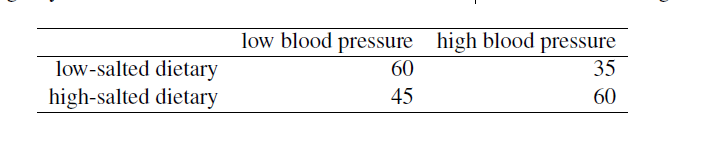

1. Test a hypothesis on whether salt intake affects blood pressure.

2. If the data show a strong correlation, can we conclude that high-salted dietary causes high blood pressure from study A? Explain your answer.

3. If the data show a strong correlation, can we conclude that high-salted dietary causes high blood pressure
from study B? Explain your answer.


---

Hypothesis Testing:

Null Hypothesis ($H_0$​): There is no association between salt intake and blood pressure.

Alternative Hypothesis ($H_1$​): There is an association between salt intake and blood pressure.

In [23]:
"""
To test the hypothesis on whether salt intake affects blood pressure,
Let's use the Chi-Square Test of Independence.
This test will help us determine if there is a significant association
between salt intake (low-salted vs. high-salted dietary) and blood pressure (low vs. high)
"""

# import library
from scipy.stats import chi2_contingency
# Create the contingency table as a DataFrame
data = {'Low Blood Pressure': [60, 45], 'High Blood Pressure': [35, 60]}
contingency_table = pd.DataFrame(data, index=['Low-Salted Dietary', 'High-Salted Dietary'])

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Test")
print(f"Chi2 Statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Test
Chi2 Statistic: 7.45
p-value: 0.0063
Degrees of Freedom: 1
Expected Frequencies:
[[49.875 45.125]
 [55.125 49.875]]


---


Interpretation:

    The chi-square test indicates that the difference in blood pressure distribution between the low-salted and high-salted dietary groups is statistically significant.
    
    There is sufficient evidence to conclude that there is an association between salt intake and blood pressure.
    The significant p-value (0.0063) suggests that there is a statistically significant association between salt intake (low-salted vs. high-salted dietary) and blood pressure (low vs. high).
    Since the p-value (0.0063) is less than the significance level ($\alpha$ = 0.05), we reject the null hypothesis.
    
    The observed frequencies deviate significantly from these expected frequencies, leading to the rejection of the null hypothesis.
    This means that salt intake does affect blood pressure, as evidenced by the observed data differing significantly from the expected frequencies under the assumption of independence.
---

    While study A may show a strong correlation between high-salted dietary intake and high blood pressure, we cannot conclude that high-salted dietary intake causes high blood pressure based on this study alone.

    Observational studies are useful for identifying associations but cannot establish causality due to the potential influence of confounding variables and the inability to control for all other factors.

    Given that study B is a randomized controlled trial with random assignment of participants to high-salted and low-salted dietary groups and subsequent measurement of blood pressure:

    Yes, we can conclude that high-salted dietary intake causes high blood pressure from study B, assuming that the data show a strong correlation and other aspects of the study are properly controlled and conducted.